# Programming Assignment 4: Image Classification using Bag_of_Features

## Setup

In [0]:
from google.colab import files

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
pip install opencv-contrib-python==3.4.2.17

In [40]:
import cv2
cv2.__version__

'3.4.2'

In [3]:
# Set up parameters, image paths and category list
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import time
import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from PA4_utils import *
import Bag_of_Features_code as bfc


# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['airplanes', 'butterfly','car_side','grand_piano','helicopter', 'Motorbikes', 
              'sunflower','umbrella',];
# This list of shortened category names is used later for visualization
#abbr_categories = ['Apl', 'Bfy', 'Car', 'Pno', 'Hel', 'Mbk', 'Sfl', 'Umb'];
abbr_categories = ['Apl', 'Bfy', 'Car', 'Pno', 'Hel', 'Mbk', 'Sfl', 'Umb'];

# Number of training examples per category to use. Max is 100. 
num_train_per_cat = 100

# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 800 elements
# where each element is a string.

data_path = osp.join('/content/drive/My Drive/Data/Computer_vision', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
def show_interest_points(path):
  
  sift = cv2.xfeatures2d.SIFT_create()
  img = cv2.imread(path)
       
  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  (interest_points, _) = sift.detectAndCompute(gray, None)
  I = cv2.drawKeypoints(img,interest_points,img)#,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  I = cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
  return I
  


Plot the images with keypoints

In [0]:
%matplotlib inline

path1 = '/content/drive/My Drive/Data/Computer_vision/data/train/Motorbikes/image_0006.jpg'
path2 = '/content/drive/My Drive/Data/Computer_vision/data/train/airplanes/image_0602.jpg'
path3 = '/content/drive/My Drive/Data/Computer_vision/data/train/butterfly/image_0063.jpg'
path4 = '/content/drive/My Drive/Data/Computer_vision/data/train/butterfly/image_0049.jpg'
path5 = '/content/drive/My Drive/Data/Computer_vision/data/train/car_side/image_0052.jpg'
path6 = '/content/drive/My Drive/Data/Computer_vision/data/train/sunflower/image_0063.jpg'
path7 = '/content/drive/My Drive/Data/Computer_vision/data/train/umbrella/image_0027.jpg'
path8= '/content/drive/My Drive/Data/Computer_vision/data/train/grand_piano/image_0025.jpg'

I1 = show_interest_points(path5)
I2 = show_interest_points(path1)
I3 = show_interest_points(path6)
I4 = show_interest_points(path3)


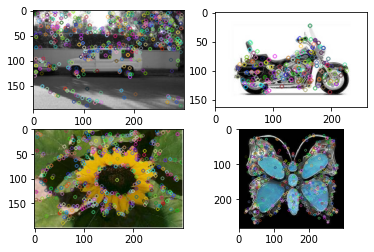

In [11]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(I1)
axarr[0,1].imshow(I2)
axarr[1,0].imshow(I3)
axarr[1,1].imshow(I4)
#axarr[1,1] = plt.imshow(image_datas[3])

## Bag of SIFT features with Nearest Neighbor classifier

### Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [23]:
# start_1 = time.time()

print('Using the BAG-OF-SIFT representation for images')

vocab_filename = 'vocab.pkl'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabulary found. Computing one from training images')
    vocab_size = 250  # Larger values will work better (to a point) but be slower to compute
    vocab = bfc.build_vocabulary(train_image_paths, vocab_size)
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))


# end_1 =time.time()
# total_1 = end_1 - start_1
# print("Total time taken for first step (in seconds):,",total_1)

# start_2= time.time()

vocab_filename = "/content/vocab.pkl"

train_image_feats = bfc.get_bags_of_sifts(train_image_paths, vocab_filename)
test_image_feats = bfc.get_bags_of_sifts(test_image_paths, vocab_filename)

# end_2 =time.time()
# total_2 = end_2 - start_2

# print("Total time taken for second step (in seconds):,",total_2)

# print("Total time taken in seconds:,",total_1 + total_2)


Using the BAG-OF-SIFT representation for images


### Classify each test image by training and using the Nearest Neighbor classifier

K = 1

In [40]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats)

Using NEAREST NEIGHBOR classifier to predict test set categories


###  Build a confusion matrix and score the recognition system

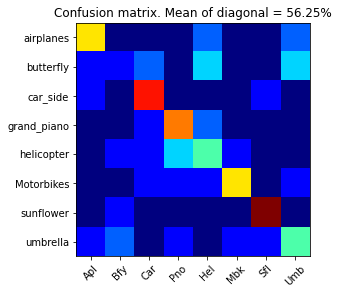

In [41]:
%matplotlib inline
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

K = 11

In [42]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats)

Using NEAREST NEIGHBOR classifier to predict test set categories


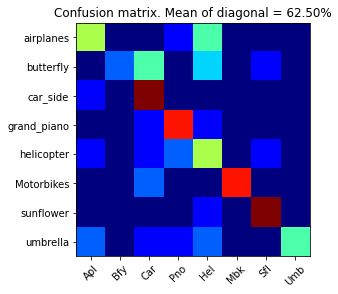

In [43]:
%matplotlib inline
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from before.

The difference is that this time we will classify them with a support vector machine (SVM).

### Classify each test image by training and using the SVM classifiers

In [38]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


### Build a confusion matrix and score the recognition system

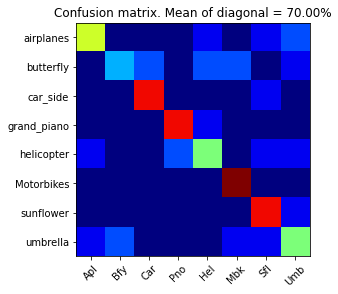

In [39]:
%matplotlib inline
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

In [0]:
# %matplotlib inline
# import seaborn as sn
# import pandas as pd

# df_cm = pd.DataFrame(cm, index = [i for i in categories],
#                   columns = [i for i in abbr_categories])
# plt.figure(figsize = (10,7))
# plt.title('Confusion matrix. Mean of diagonal = {:4.2f}%'.format(acc*100))

# sns_plot = sn.heatmap(df_cm, annot=True)
# fig = sns_plot.get_figure()


Install part